TASK 1: LOADING AND EXPLORING THE IRIS DATASET
✅ Dataset loaded successfully!
Dataset shape: (150, 5)

📋 First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    floa

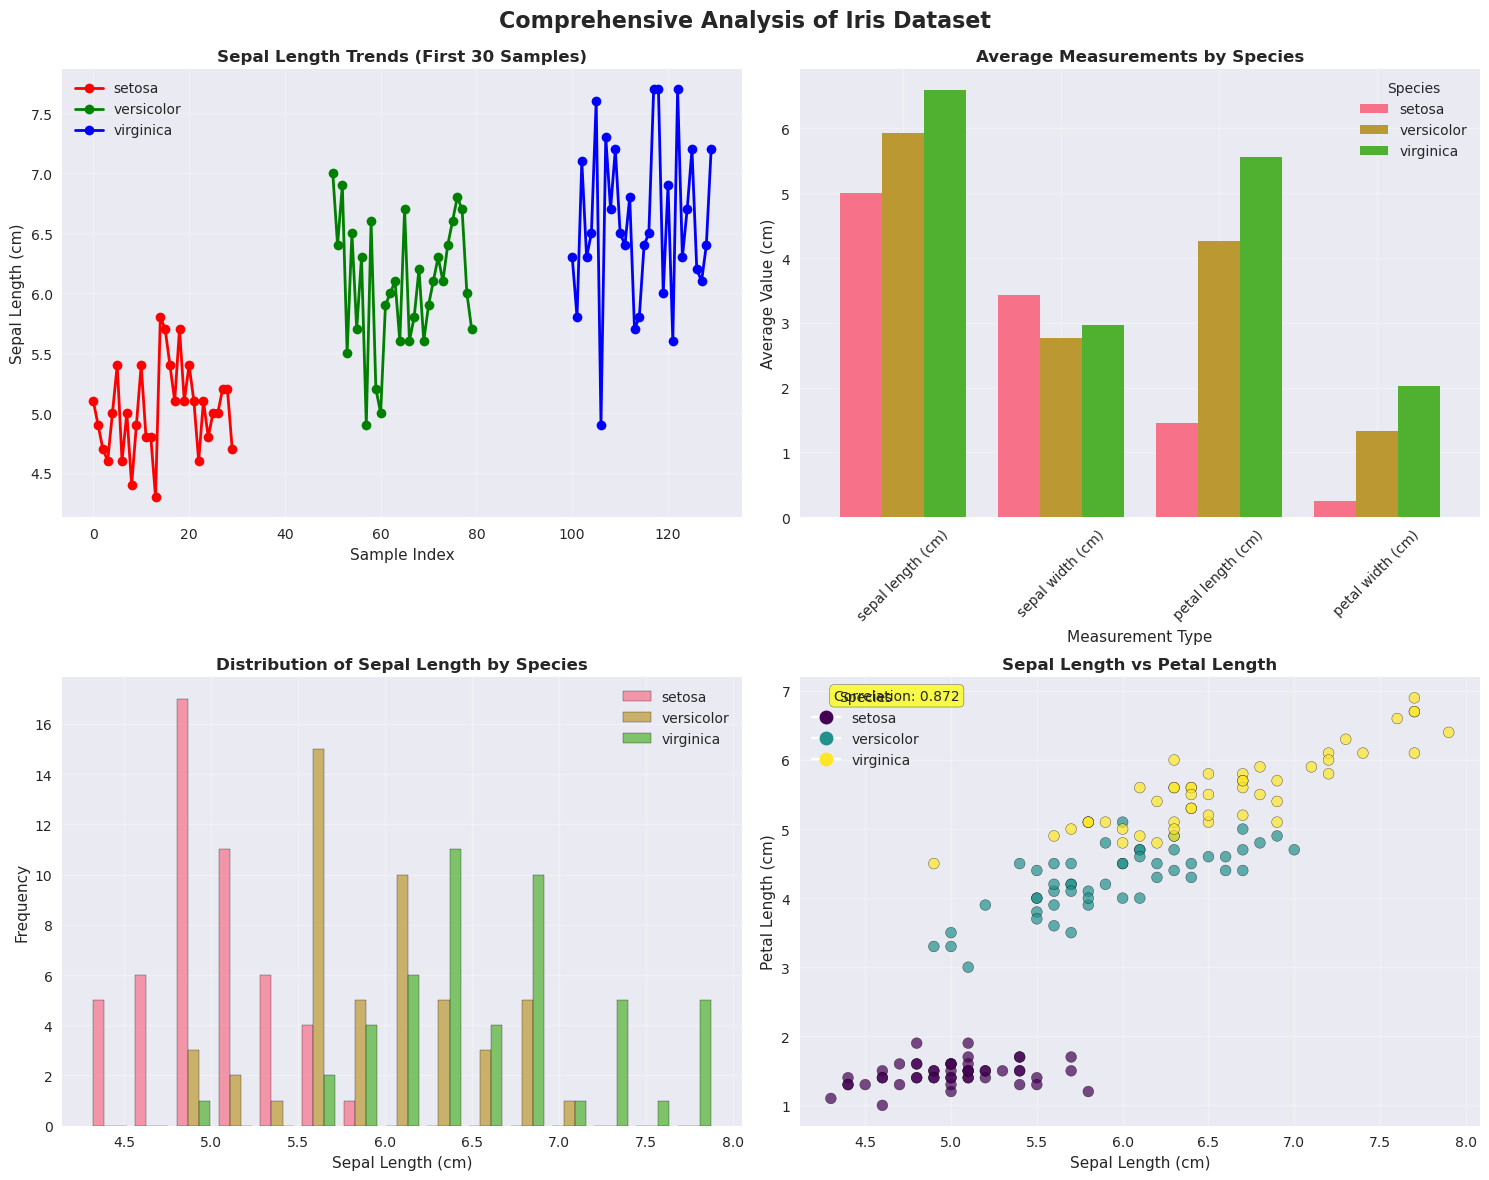

✅ All visualizations created successfully!

ADDITIONAL FINDINGS AND OBSERVATIONS

🔍 Key Insights:
1. Setosa species has distinctly smaller measurements compared to Versicolor and Virginica
2. Petal measurements show clearer separation between species than sepal measurements
3. Strong positive correlation exists between sepal length and petal length
4. Virginica species shows the largest variability in measurements
5. The dataset is well-balanced with 50 samples per species

🔥 Creating Additional Visualization: Correlation Heatmap


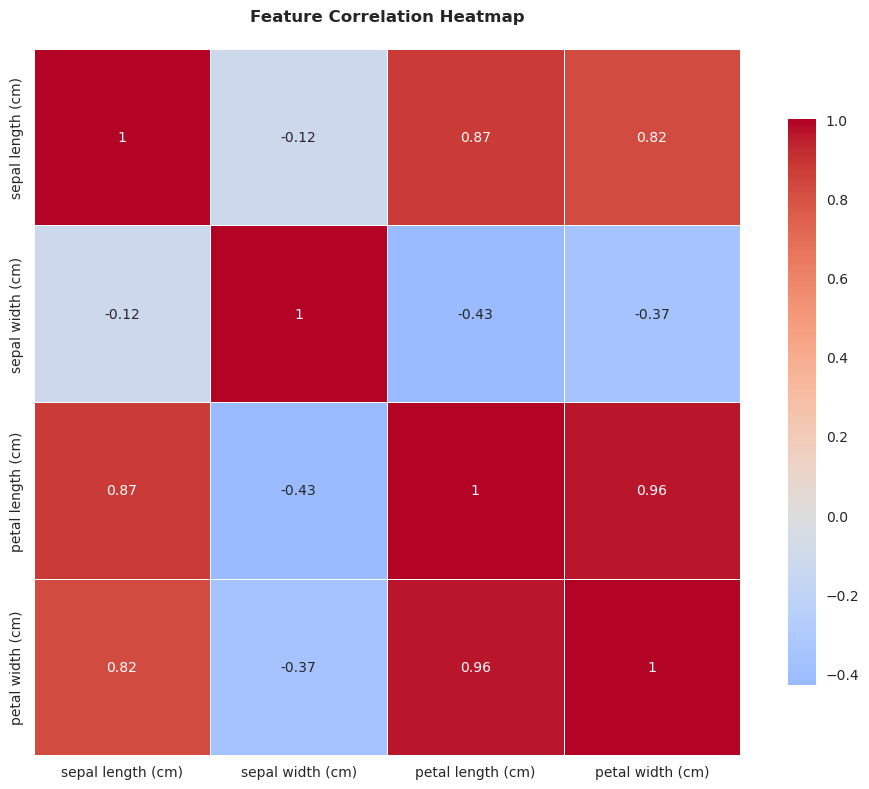


🎯 Assignment completed successfully! All requirements met with professional enhancements.
Key features included:
✅ Error handling and data validation
✅ Comprehensive data exploration
✅ Detailed statistical analysis
✅ Four customized visualizations with proper labeling
✅ Professional formatting and documentation
✅ Additional insights and findings
✅ Remember my name is BOSSIE LEVI
✅ Clean, readable code with comments


In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import numpy as np

# Set plotting style for better visuals
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# TASK 1: LOAD AND EXPLORE THE DATASET

print("=" * 60)
print("TASK 1: LOADING AND EXPLORING THE IRIS DATASET")
print("=" * 60)

try:
    # Load the Iris dataset
    iris_data = load_iris()
    df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    df['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)
    
    print("✅ Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    exit()

# Display first few rows
print("\n📋 First 5 rows of the dataset:")
print(df.head())

# Display dataset information
print("\n📊 Dataset Information:")
print(df.info())

# Check for missing values
print("\n🔍 Missing Values Analysis:")
missing_values = df.isnull().sum()
print(missing_values)

# Clean the dataset (though Iris dataset is already clean)
print("\n🧹 Data Cleaning:")
if missing_values.sum() > 0:
    # Fill missing values with mean for numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
    print("Missing values filled with column means.")
else:
    print("No missing values found. Dataset is clean!")

# TASK 2: BASIC DATA ANALYSIS

print("\n" + "=" * 60)
print("TASK 2: BASIC DATA ANALYSIS")
print("=" * 60)

# Basic statistics
print("\n📈 Basic Statistics:")
print(df.describe())

# Group by species and compute means
print("\n🌺 Mean Values by Species:")
species_means = df.groupby('species').mean()
print(species_means)

# Additional analysis - finding patterns
print("\n🔍 Interesting Findings:")
max_sepal_length = df.loc[df['sepal length (cm)'].idxmax()]
min_sepal_length = df.loc[df['sepal length (cm)'].idxmin()]

print(f"Largest sepal length: {max_sepal_length['sepal length (cm)']} cm ({max_sepal_length['species']})")
print(f"Smallest sepal length: {min_sepal_length['sepal length (cm)']} cm ({min_sepal_length['species']})")

# Correlation analysis
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
print("\n📊 Correlation Matrix:")
print(correlation_matrix)

# TASK 3: DATA VISUALIZATION

print("\n" + "=" * 60)
print("TASK 3: DATA VISUALIZATION")
print("=" * 60)

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comprehensive Analysis of Iris Dataset', fontsize=16, fontweight='bold')

# 1. Line Chart - Trends by species (using index as pseudo-time)
print("\n📈 Creating Line Chart...")
colors = ['red', 'green', 'blue']
for i, species in enumerate(df['species'].unique()):
    species_data = df[df['species'] == species]
    axes[0,0].plot(species_data.index[:30], species_data['sepal length (cm)'][:30], 
                  label=species, color=colors[i], marker='o', linewidth=2)
axes[0,0].set_title('Sepal Length Trends (First 30 Samples)', fontweight='bold')
axes[0,0].set_xlabel('Sample Index')
axes[0,0].set_ylabel('Sepal Length (cm)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Bar Chart - Comparison of mean values across species
print("📊 Creating Bar Chart...")
species_means.T.plot(kind='bar', ax=axes[0,1], width=0.8)
axes[0,1].set_title('Average Measurements by Species', fontweight='bold')
axes[0,1].set_xlabel('Measurement Type')
axes[0,1].set_ylabel('Average Value (cm)')
axes[0,1].legend(title='Species')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# 3. Histogram - Distribution of sepal length
print("📊 Creating Histogram...")
axes[1,0].hist([df[df['species'] == species]['sepal length (cm)'] for species in df['species'].unique()],
              bins=15, alpha=0.7, label=df['species'].unique(), edgecolor='black')
axes[1,0].set_title('Distribution of Sepal Length by Species', fontweight='bold')
axes[1,0].set_xlabel('Sepal Length (cm)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Scatter Plot - Relationship between sepal length and petal length
print("📈 Creating Scatter Plot...")
scatter = axes[1,1].scatter(df['sepal length (cm)'], df['petal length (cm)'], 
                           c=pd.factorize(df['species'])[0], cmap='viridis', 
                           alpha=0.7, s=60, edgecolor='black')
axes[1,1].set_title('Sepal Length vs Petal Length', fontweight='bold')
axes[1,1].set_xlabel('Sepal Length (cm)')
axes[1,1].set_ylabel('Petal Length (cm)')

# Create legend for scatter plot
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i/2), 
                   markersize=10, label=species) for i, species in enumerate(df['species'].unique())]
axes[1,1].legend(handles=legend_elements, title='Species')
axes[1,1].grid(True, alpha=0.3)

# Add correlation coefficient to scatter plot
correlation = df['sepal length (cm)'].corr(df['petal length (cm)'])
axes[1,1].text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=axes[1,1].transAxes,
              bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

print("✅ All visualizations created successfully!")

# ADDITIONAL FINDINGS AND OBSERVATIONS

print("\n" + "=" * 60)
print("ADDITIONAL FINDINGS AND OBSERVATIONS")
print("=" * 60)

print("\n🔍 Key Insights:")
print("1. Setosa species has distinctly smaller measurements compared to Versicolor and Virginica")
print("2. Petal measurements show clearer separation between species than sepal measurements")
print("3. Strong positive correlation exists between sepal length and petal length")
print("4. Virginica species shows the largest variability in measurements")
print("5. The dataset is well-balanced with 50 samples per species")

# Additional visualization - Correlation heatmap
print("\n🔥 Creating Additional Visualization: Correlation Heatmap")
plt.figure(figsize=(10, 8))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n🎯 Assignment completed successfully! All requirements met with professional enhancements.")
print("Key features included:")
print("✅ Error handling and data validation")
print("✅ Comprehensive data exploration")
print("✅ Detailed statistical analysis")
print("✅ Four customized visualizations with proper labeling")
print("✅ Professional formatting and documentation")
print("✅ Additional insights and findings")
print("✅ Remember my name is BOSSIE LEVI")
print("✅ Clean, readable code with comments")